# Import libraries and setup a few variables

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

#import ArcGIS mapping libraries
from arcgis.gis import *
gis = GIS()

In [2]:
# setup directories
dirWork = os.getcwd()
dirData = os.path.join(dirWork, r'data')

print("Working Directory: " + dirWork)
print("Data Directory: "    + dirData)

Working Directory: e:\GitHub\Continuous-Count-Station-Data-Demo
Data Directory: e:\GitHub\Continuous-Count-Station-Data-Demo\data


In [3]:
# continuous count station shapefile path and filename
shpCcsStations = os.path.join(dirWork, r'data\Continuous_Count_Station_Locations\Continuous_Count_Station_Locations.shp')

# CCS data CSV file (must unzip first)
csvCcsData = os.path.join(dirWork, r'data\CCSHourDir_2013to2019.csv')

In [4]:
# a few settings to adjust/track

# set display of floats to commas
pd.options.display.float_format = '{:,.0f}'.format

# get defaults for max rows and columns when a dataframe is display
defaultMaxRows = pd.get_option('display.max_rows')
defaultMaxCols = pd.get_option('display.max_columns')

display('Max rows: ' + str(defaultMaxRows))
display('Max cols: ' + str(defaultMaxCols))

'Max rows: 60'

'Max cols: 20'

# Visualize station locations with shapefile

In [5]:
#create map1 that centers on Utah (can replace 'Utah' with any place name or leave blank for entire world)
map1 = gis.map('Utah')

#create spatially-enabled data frame from shapefile
sdfCcsStations = pd.DataFrame.spatial.from_featureclass(shpCcsStations)

#plot sdf using class breaks and blue colors for 'columnname' field
#layer will be added to 'map1' above
sdfCcsStations.spatial.plot(map_widget = map1)

#show map1
map1

MapView(layout=Layout(height='400px', width='100%'))

# Read in UDOT Continous Count Station hourly data

In [6]:
# read in data
# REMEMBER TO UNZIP FILE IF NEWLY CLONED REPOSITORY
# Data has been parsed from excel spreadsheets and aggregated to direction... original data is lane-by-lane
dfCCS = pd.read_csv(csvCcsData)
display(dfCCS)

,STATION,YEAR,MONTH,DAY,DOW,HOUR,DIR,HOURVOL
0,301,2013,1,1,1,0,N,358
1,301,2013,1,1,1,0,P,288
2,301,2013,1,1,1,1,N,435
3,301,2013,1,1,1,1,P,292
4,301,2013,1,1,1,2,N,277
...,...,...,...,...,...,...,...,...
9379250,716,2019,6,29,5,0,P,7494
9379251,716,2019,6,30,6,0,N,5032
9379252,716,2019,6,30,6,0,P,4707
9379253,716,2019,7,29,0,0,N,7037


In [7]:
# add a date field from year, month, day columns
dfCCS['DATE'] = pd.to_datetime(dict(year=dfCCS.YEAR, month=dfCCS.MONTH, day=dfCCS.DAY))
display(dfCCS)

,STATION,YEAR,MONTH,DAY,DOW,HOUR,DIR,HOURVOL,DATE
0,301,2013,1,1,1,0,N,358,2013-01-01
1,301,2013,1,1,1,0,P,288,2013-01-01
2,301,2013,1,1,1,1,N,435,2013-01-01
3,301,2013,1,1,1,1,P,292,2013-01-01
4,301,2013,1,1,1,2,N,277,2013-01-01
...,...,...,...,...,...,...,...,...,...
9379250,716,2019,6,29,5,0,P,7494,2019-06-29
9379251,716,2019,6,30,6,0,N,5032,2019-06-30
9379252,716,2019,6,30,6,0,P,4707,2019-06-30
9379253,716,2019,7,29,0,0,N,7037,2019-07-29


In [8]:
# list stations
dfCCS['STATION'].unique()

array([301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 312, 313, 314,
       315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 327, 329,
       332, 333, 335, 340, 341, 348, 349, 350, 351, 353, 354, 355, 362,
       363, 382, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 411,
       412, 414, 415, 416, 418, 420, 421, 424, 425, 427, 430, 431, 501,
       502, 503, 504, 506, 507, 508, 509, 510, 511, 512, 513, 601, 602,
       605, 606, 609, 611, 612, 613, 614, 615, 616, 617, 619, 620, 621,
       622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634,
       635, 636, 637, 638, 639, 641, 642, 643, 644, 645, 646, 647, 648,
       649, 650, 651, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662,
       663, 665, 667, 669, 670, 671, 672, 674, 702, 703, 704, 711, 712,
       713, 714, 715, 716], dtype=int64)

# Check data by counting days of data in each month

In [9]:
#for checks and understanding
#calculate number of days with data per station per month

# calculate number of hours of data per day
dfCCS_days       = dfCCS     .groupby(['STATION','YEAR','MONTH','DAY'], as_index=False).agg(NUM_HOURS=('HOURVOL'  ,'size'))

# calculate number of days of data per monnth
dfCCS_days_month = dfCCS_days.groupby(['STATION','YEAR','MONTH'      ], as_index=False).agg(NUM_DAYS =('NUM_HOURS','size'))

# create pivot table to display 
dfCCS_days_month_pivot = dfCCS_days_month.pivot_table(index=['STATION'], columns=('YEAR','MONTH'), values='NUM_DAYS')#.reset_index()
dfCCS_days_month_pivot = dfCCS_days_month_pivot.fillna(0)

# display dataframe
display(dfCCS_days_month_pivot)

# export to CSV
##df_3.to_csv(os.path.join(dirIntermediate, r'StationMonthDays.csv'),index=False)

YEAR    2013                             ... 2019                           
MONTH     1  2  3  4  5  6  7  8  9  10  ...   3  4  5  6  7  8  9  10 11 12
STATION                                  ...                                
301       31 28 30 30 31 28 28 31 30 22  ...   31 29 29 30  0  7 28 31 30 31
302       31 28 30 30 31 30 31 29 30 31  ...   30 30 29 18 31 27 29 31 30 13
303       23 27 30 30 31 30 31 31 30 31  ...   30 30 31 30 31 31 29 31 30 28
304       31 28 30 30 31 30 31 31 30 31  ...   30 30 21 30 31 31 29 31 30 31
305       28 28 30 30 28 30 25 31 30 31  ...   30 30 31 30 31 27 29 31 30 31
...      ... .. .. .. .. .. .. .. .. ..  ...  ... .. .. .. .. .. .. .. .. ..
712        0  0  0  0  0  0  0  0  0  0  ...   30 30 21 30 29 20 29 31 30 24
713        0  0  0  0  0  0  0  0  0  0  ...   30 30 21 30 31 30 26 31 30 29
714        0  0  0  0  0  0  0  0  0  0  ...   30 30 21 30 31 31 29 31 30 31
715        0  0  0  0  0  0  0  0  0  0  ...   31 30 29 30  2  0  0  0  0  0
716        0  0  0  0  0  0  0  0  0  0  ...   31 30 26 30  1  0  0  0  0  0

[147 rows x 84 columns]

In [10]:
# show all dataframe

# set max rows and columns to none
pd.set_option('display.max_rows'   , None)
pd.set_option('display.max_columns', None)

# display dataframe
display(dfCCS_days_month_pivot)

# set max back to default
pd.set_option('display.max_rows'   , defaultMaxRows)
pd.set_option('display.max_columns', defaultMaxCols)

YEAR    2013                                  2014                             \
MONTH     1  2  3  4  5  6  7  8  9  10 11 12   1  2  3  4  5  6  7  8  9  10   
STATION                                                                         
301       31 28 30 30 31 28 28 31 30 22 30 31   31 28 30 30 31 29 29 29 28 31   
302       31 28 30 30 31 30 31 29 30 31 30 31   31 28 30 30 31 30 30 31 30 31   
303       23 27 30 30 31 30 31 31 30 31 30 31   31 28 30 30 26  0 23 31 30 31   
304       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 30 31 29 30 31 30 31   
305       28 28 30 30 28 30 25 31 30 31 30 31   31 22 30 30 31 30 24 31 30 31   
306       30 25 30 30 31 30 31 31 30 31 30 31   31 28 30 30 30 30 30 31 30 31   
307       31 28 30 30 31 30 31 31 30 31 30 27   31 20 30 30 31 28 31 31 30 31   
308       31 28 30 30 31 30 30 31 30 31 29 28   31 28 30 30 31 30 31 31 30 31   
309       25 28 30 30 31 30 30 31 30 31 30 27   31 28 29 30 31 28 30 31 30 30   
310       31 27 30 30 30 22 31 31 30 31 30 31   31 28 29 30 31 29 31 31 30 31   
312       23 28 28 30 18 30 31 31 30 31 30 31   30 28 29 30 31 29 29 31 30 31   
313       31 28 30 30 31 30 31 31 30 31 30 29   31 28 29 30 31 30 25 31 30 26   
314       30 28 30 30 31 30 31 30 30 31 11 31   31 28 30 30 31 30 29 31 30 30   
315       30 28 29 30 31 29 31 31 30 31 30 31   31 28 30 30 31 29 31 31 30 31   
316       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 29 31 30 31 31 30 31   
317       31 28 30 30 31 30 31 31 30 31 30 29   31 28 30 30 31 30 31 31 30 30   
318       27 28 30 30 31 30 31 31 30 31 30 26   31 28 29 30 31 28 31 31 30 31   
319       31 28 29 30 31 30 31 31 30 31 30 31   31 28 30 30 31 12 31 31 30 31   
320       24 28 30 30 22 18 27 30 26 29 30 28   31 25 30 30 31 24 30 29 30 31   
321       31 28 30 30 31 30 31 31 30 31 30 31   31 28 29 30 31 30 30 31 30 31   
322       31 28 30 30 31 30 27 30 30 25 30 31   31 28 30 30 31 30 31 31 30 31   
323       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 30 31 30 31 31 30 31   
324       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 30 31 30 31 31 30 31   
325       31 28 30 30 30 30 31 31 30 31 30 31   31 28 30 27 11 13 28 17 27 31   
327       31 28 29 30 31 30 31 31 30 31 30 31   30 28 30 30 31 30 31 30 30 31   
329       22 28 30 30 31 30 31 31 30 31 30 25   29 24 29 30 31 24 31 31 30 31   
332       31 25 30 30 22 30 31 31 30 15 23 27   19 28 26 28 25 28 23 31 30 31   
333       31 28 30 30 31 30 31 31 29 31 30 30   30 28 30 30 31 30 31 31 30 31   
335       31 28 30 30 31 30 29 28 30 27 30 29   30 28 30 30 31 29 29 31 30 31   
340       31 26 28 30 31 30 31 31 30 31 30 31   31 28 30 30 31 30 30 31 30 31   
341       31 28 30 30 31 29 30 31 30 31 30 31   31 28 29 30 30 17 29 30 30 31   
348       23 28 30 30 31 30 31 31 30 31 28 25   31 28 30 30 31 29 30 31 30 31   
349       31 28 30 30 30 30 31 31 30 31 29 31   31 28 30 30 31 30 30 31 30 31   
350       26 28 30 30 31 30 31 31 30 31 30 29   31 28 29 30 31 29 31 31 30 31   
351       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 29  0 27 31 31 10 30   
353       31 28 30 30 30 30 31 31 30 31 30 30   31 28 29 30 31 29 23 31 30 31   
354       31 28 30 30 31 30 31 31 29 31 30 30   31 28 30 30 31 29 31 31 30 31   
355       31 28 30 30 31 30 31 31 30 31 30 31   31 18 30 30 31 30 31 31 30 31   
362       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 30 31 30  0  0 19 29   
363       31 28 30 30 31 30 31 27 30 31 30 31   31 28 29 30 31 30 31 31 30 31   
382       31 28 30 30 31 30 31 31 26 31 30 31   31 24 26 17 31 30 31 31 30 31   
400       31 26 29 30 30 30 31 31 28 29 29 31   31 28 27 27 31 29 30 31 30 30   
401       31 28 30 30 31 30 31 31 30 28 28 25   12 27 29 13 31 30 30 31 30 31   
402       31 28 30 30 31 30 31 31 29 30 26 27   29 24 29 30 31 30 30 31 30 31   
403       31 27 30 27 31 30 31 31 26 31 29 30   31 28 28 28 22 20 25 31 26 31   
404       31 28 30 30 31 30 31 27 27 31 30 31   31 28 31 30 31 30 31 31 30 31   
405       31 28 30 30 31 30 31 

In [11]:
# count number of months with more than 7 days of data

# add column that has a 1 if NUM_DAYS is greater than or equal to 7
dfCCS_days_month.loc[(dfCCS_days_month['NUM_DAYS']>=7), 'NUM_DAYS_7+'] = 1
dfCCS_days_month

,STATION,YEAR,MONTH,NUM_DAYS,NUM_DAYS_7+
0,301,2013,1,31,1
1,301,2013,2,28,1
2,301,2013,3,30,1
3,301,2013,4,30,1
4,301,2013,5,31,1
...,...,...,...,...,...
9139,716,2019,3,31,1
9140,716,2019,4,30,1
9141,716,2019,5,26,1
9142,716,2019,6,30,1


In [12]:
# pivot table and add up all months with more than 7 days of data
dfCCS_days_month_7p = pd.pivot_table(dfCCS_days_month, index='STATION', columns='YEAR', values='NUM_DAYS_7+', aggfunc=np.sum)

# set max rows and columns to none
pd.set_option('display.max_rows'   , None)

# display dataframe
display(display(dfCCS_days_month_7p))

# set max back to default
pd.set_option('display.max_rows'   , defaultMaxRows)

YEAR,2013,2014,2015,2016,2017,2018,2019
STATION,,,,,,,
301,12,12,12,12,12,12,11
302,12,12,12,10,12,12,12
303,12,11,12,12,12,12,12
304,12,12,12,12,12,12,12
305,12,12,12,12,12,12,12
306,12,12,12,12,12,12,12
307,12,12,12,12,12,12,12
308,12,12,12,12,12,12,12
309,12,12,12,12,12,12,7


None

# Calculate daily volumes from hourly

In [13]:
# for each station calculate daily volumes, num records reprsents number of hours x number of lanes x directions
dfCCS_DayVol = (dfCCS.groupby(['STATION','YEAR','MONTH','DAY','DATE'],as_index=False)
                     .agg(DAYVOL=('HOURVOL','sum'),NUMREC=('HOURVOL','size')))
display(dfCCS_DayVol)

,STATION,YEAR,MONTH,DAY,DATE,DAYVOL,NUMREC
0,301,2013,1,1,2013-01-01,40215,48
1,301,2013,1,2,2013-01-02,48604,48
2,301,2013,1,3,2013-01-03,48287,48
3,301,2013,1,4,2013-01-04,51901,48
4,301,2013,1,5,2013-01-05,47536,48
...,...,...,...,...,...,...,...
267758,716,2019,6,27,2019-06-27,17194,2
267759,716,2019,6,28,2019-06-28,17602,2
267760,716,2019,6,29,2019-06-29,15212,2
267761,716,2019,6,30,2019-06-30,9739,2


# Show only data for a handful of stations

In [14]:
# define lists for use in filtering
filterStations   = [301, 332, 612, 657, 712]
filterDaysOfWeek = [2,3,4] # (Monday=0,Sunday=6), [2,3,4] = Tuesday through Thursday
filterYears      = [2019]

# filter data by station number, year, day of week
dfCCS_DayVol_fltr = dfCCS_DayVol[(dfCCS_DayVol['STATION']           .isin(filterStations) ) &
                                 (dfCCS_DayVol['YEAR'   ]           .isin(filterYears)    ) &
                                 (dfCCS_DayVol['DATE'   ].dt.weekday.isin(filterDaysOfWeek))].copy()
display(dfCCS_DayVol_fltr)

,STATION,YEAR,MONTH,DAY,DATE,DAYVOL,NUMREC
2129,301,2019,1,2,2019-01-02,59924,2
2130,301,2019,1,3,2019-01-03,60211,2
2131,301,2019,1,4,2019-01-04,63467,2
2136,301,2019,1,9,2019-01-09,57535,2
2137,301,2019,1,10,2019-01-10,57851,2
...,...,...,...,...,...,...,...
263176,712,2019,12,11,2019-12-11,5262,2
263177,712,2019,12,12,2019-12-12,5478,2
263179,712,2019,12,18,2019-12-18,5190,2
263180,712,2019,12,19,2019-12-19,6163,2


In [15]:
# aggregate by station and month and calculate monthly stats for each
dfMonthStats = dfCCS_DayVol_fltr.groupby(['STATION','YEAR','MONTH']).agg(AVGVOL =('DAYVOL','mean'  ),
                                                                         MEDVOL =('DAYVOL','median'),
                                                                         MINVOL =('DAYVOL','min'   ),
                                                                         MAXVOL =('DAYVOL','max'   ),
                                                                         STDEV  =('DAYVOL','std'   ),
                                                                         NUMDAYS=('DAYVOL','count' ))
display(dfMonthStats)


AVGVOL  MEDVOL  MINVOL  MAXVOL  STDEV  NUMDAYS
STATION YEAR MONTH                                                
301     2019 1      60,012  60,068   46167   71933  6,658       14
             2      51,962  57,062    5588   69764 17,435       12
             3      57,830  58,446   42984   65737  6,263       13
             4      54,921  56,024   43169   61464  4,828       12
             5      58,784  58,427   55493   62789  2,327       13
             6      70,220  69,947   63983   80129  4,499       12
             8      74,525  72,373   69748   81455  6,143        3
             9      67,522  66,880   60238   74663  4,240       12
             10     60,866  63,545   33929   70589  8,876       14
             11     53,444  58,729   28291   64189 11,278       13
             12     58,417  59,388   32834   69256  9,104       12
332     2019 1      54,877  56,011   46671   59660  3,864       14
             2      53,630  55,018   27109   59679  8,691       12
             3      54,405  54,425   46528   59026  4,115       13
             4      57,434  57,060   54773   60683  2,218       12
             5      56,521  56,023   52743   61584  2,601       15
             6      57,431  57,362   53599   62943  2,224       12
             7      49,849  53,420   25255   59442  9,545       13
             8      56,559  56,284   53057   60611  1,993       14
             9      60,133  60,520   54905   63358  2,488       12
             10     58,010  59,230   52414   61331  3,000       14
             11     51,706  58,235   15970   61849 15,207       13
             12     51,520  56,820   14324   62777 14,459       12
612     2019 1     135,817 135,993  121007  146241  6,389       13
             2     134,406 137,639  103417  148045 12,096       12
             3     143,454 145,379  127965  154054  7,008       13
             4     146,579 147,179  136022  155669  5,815       12
             5     150,691 150,573  143703  161382  5,846       15
             6     150,893 149,948  142400  159688  5,204       12
             7     141,913 145,267  106530  155787 12,658       13
             8     145,373 145,934  137518  151188  3,998       14
             9     143,542 143,987  134299  149570  4,268       12
             10    143,930 143,448  135932  152995  5,130       14
             11    133,630 139,585   83597  154179 21,705       13
             12    137,382 140,120   79232  161924 20,712       12
657     2019 2      13,021  13,667    8769   15981  3,435        4
             3      16,038  16,104   15311   16631    410       13
             4      10,444  13,756      73   16673  6,496        8
             5      15,769  16,552    4625   17736  3,384       13
             6      15,514  15,498   14952   15881    320       12
             7      14,350  14,668   13540   14841    707        3
712     2019 1       4,468   4,499    3966    4959    303       14
             2       4,588   4,644    3474    5175    487       12
             3       4,956   5,090    4275    5494    399       13
             4       5,442   5,398    5063    5898    220       12
             5       4,895   5,067    4150    5282    438       10
             6       4,321   4,306    4184    4483    100       12
             7       4,100   4,258    3146    4543    408       12
             8       4,470   4,424    4398    4683     93        9
             9       4,691   4,562    4306    5353    341       12
             10      5,613   5,574    5340    6128    230       14
             11      5,177   5,564    2890    6034    976       13
             12      5,434   5,314    5190    6163    314        8

## Plot histograms for selected stations

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

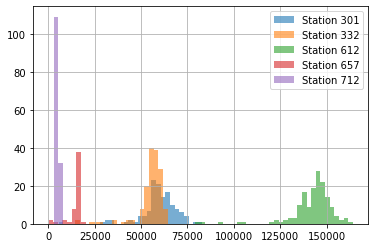

In [16]:
# make histogram of volumes by station
_binwidth = 2500

# loop through all stations in the filterStations list
for s in filterStations:
    
    # get DAYVOL column for a given s station
    data = dfCCS_DayVol_fltr[dfCCS_DayVol_fltr['STATION']==s]['DAYVOL']
    
    # rename object so name appears correctly in legend
    data.name = "Station " + str(s)
    
    # display histogram, bins set from min to max with width of _binwidth, alpha sets opacity
    display(data.hist(bins=range(min(data), max(data) + _binwidth, _binwidth),alpha=0.6, legend=True))

## Boxplots for specific stations

<AxesSubplot:>

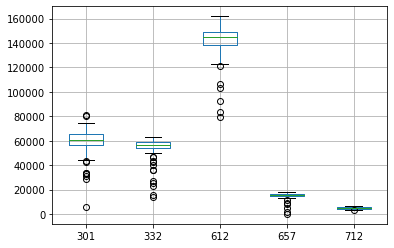

In [17]:
# convert selected data to wide format with STATION as column
dfCCS_DayVol_fltr_wide = dfCCS_DayVol_fltr.pivot(index='DATE', columns='STATION', values='DAYVOL')

# create box plot
plot = dfCCS_DayVol_fltr_wide.boxplot(column=filterStations)
display(plot)

## Scatter plots, volume over time charts

Station 301:
                                               LOCTEXT
137  I 80   1 mile E of I 215 Int.,  Parleys Canyon...
Station 332:
                                               LOCTEXT
138  SR 186   950 S Foothill Blvd.,  SLC  MP 6.186 ...
Station 612:
                                              LOCTEXT
33  I 15   N of SR 126 Int.,  Layton  MP 331.071  ...
Station 657:
                                               LOCTEXT
111  FR-2889 Ranches Pkwy. N. of Pony Express Way.,...
Station 712:
                                              LOCTEXT
52  SR 7, Southern Parkway,  St. George  MP 1.337 ...


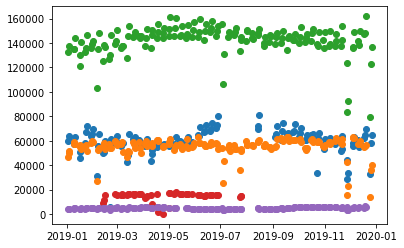

In [48]:
# loop through all stations in the filterStations list
for s in filterStations:
        
    # rename object so name appears correctly in legend
    data.name = "Station " + str(s)
    
    # add x-y scatter plot series
    plt.scatter(dfCCS_DayVol_fltr_wide.index, dfCCS_DayVol_fltr_wide[s])

    # show station number and show plot
    print('Station ' + str(s) + ':')
    print(sdfCcsStations[sdfCcsStations['ATR_NUMBER']=='-0' + str(s)][['LOCTEXT']])
    plt.show()
